In [1]:
# importando as bibliotecas

import numpy as np
import control as ct
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

# 1  Modelagem do sistema

In [43]:
# Parâmetros 

m = 1     # kilograma
m1 = 1    # kilograma
m2 = 1    # kilograma
l1 = 0.05 # metros
l2 = 0.05 # metros
g = 9.81  # m/s^2
f0 = 0.01
f1 = 0.007
f2 = 0.007
J1 = 0.00083 
J2 = 0.00083
Ts = 0.01
l = 0.45

# Simplificação
A01 =J1*J2*(m+m1+m2)+J1*l2*l2*m2*(m + m1)+J2*l1*l1*(m*m1+4*m*m2+m1*m2)
A02 = m*l1*l1*l2*l2*m1*m2
A0 = A01 + A02

A1 = g*l1*(m1+2*m2)
A2 = g*l2*m2

A3 = -J2*l1*(m1+2*m2)-l1*l2*l2*m1*m2
A4 = J2*(m+m1+m2)+m*l2*l2*m2 + l2*l2*m1*m2
A5 = -l1*l2*m2*(2*m+m1)

A6 = -l2*m2*(J1-l1*l1*m1)
A7 = -l1*l2*m2*(2*m+m1)
A8 = J1*(m+m1+m2)+l1*l1*m2*(m*m1 +4*m +m1)

B1 = J1*(J2 +l2*l2*m2) + J2*(l1*l1*m1+4*l1*l1*m2)+l1*l1*l2*l2*m1*m2
B2 = -J2*l1*m1-2*J2*l1*m2-l1*l2*l2*m1*m2
B3 = -J1*l2*m2+l1*l1*l2*m1*m2

# Matrizes de estado
A=np.array([[0, 0, 0, 1, 0, 0 ],[0, 0, 0, 0, 1, 0],[0, 0, 0, 0, 0, 1],
            [0, -(A1*A3)/A0, -(A2*A6)/A0, 0, 0, 0],[0, -(A1*A4)/A0,-(A2*A7)/A0, 0, 0, 0],[0, -(A1*A5)/A0,-(A2*A8)/A0, 0, 0, 0]])
B=np.array([[0],[0],[0],[B1/A0],[B2/A0],[B3/A0]])
C=np.array([[1, 0, 0, 0, 0, 0],[0, 1, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0]])
D=0

sys = ct.ss(A,B,C,D)

# Discreto
sys_discreto = ct.c2d(sys, Ts, method='zoh')
Ad = np.array(sys_discreto.A)
Bd = np.array(sys_discreto.B)


In [44]:
print(sys)

<StateSpace>: sys[9]
Inputs (1): ['u[0]']
Outputs (3): ['y[0]', 'y[1]', 'y[2]']
States (6): ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]', 'x[5]']

A = [[   0.            0.            0.            1.            0.
         0.        ]
     [   0.            0.            0.            0.            1.
         0.        ]
     [   0.            0.            0.            0.            0.
         1.        ]
     [   0.           14.73466591   -1.64374696    0.            0.
         0.        ]
     [   0.         -442.33526109  147.64194295    0.            0.
         0.        ]
     [   0.          442.92582886 -344.30101097    0.            0.
         0.        ]]

B = [[  0.        ]
     [  0.        ]
     [  0.        ]
     [  0.77814879]
     [-10.01336453]
     [  3.35116609]]

C = [[1. 0. 0. 0. 0. 0.]
     [0. 1. 0. 0. 0. 0.]
     [0. 0. 1. 0. 0. 0.]]

D = [[0.]
     [0.]
     [0.]]



# 2 LQR


In [101]:
# Escolhendo Q e R
""" Cenário 1: O controle é barato (menos custo)
    Cenário 2: O controle é caro (maior custo)
    Cenário 3: Ignora o valor que custa a posição, preocupação é a posicao do pendulo(despreocupado com custos)
"""
cenario =4

if cenario == 1:
        Q = np.array([[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]])
        R = np.array([0.001])
        
elif cenario == 2:
        Q = np.array([[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]])
        R = np.array([1000])
        
elif cenario == 3:
        Q = np.array([[1,0,0,0,0,0],[0,10,0,0,0,0],[0,0,10,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]])
        R = np.array([10])
elif cenario == 4:
        Q = np.array([[10,0,0,0,0,0],[0,0.0000001,0,0,0,0],[0,0,0.10,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]])
        R = np.array([0.1])
else:
        print('Método desconhecido')
        


#[K,S,E] = ct.lqr(A,B,Q,R)
[K,S,E] = ct.dlqr(Ad,Bd,Q,R)


In [102]:
print('Os ganhos K do Controlador são: ',K)

Os ganhos K do Controlador são:  [[  7.81504415 -33.41040469  28.04590974   7.8450561   -3.67837816
   -0.47013799]]


In [103]:
#controlador Lqr discreto
Ac = Ad - Bd @ K
Bc = Bd
Cc =  np.eye(6)
Dc = np.zeros_like(Bc)
Wip = ct.ss(Ac, Bc, Cc, Dc,Ts)

# Simulações

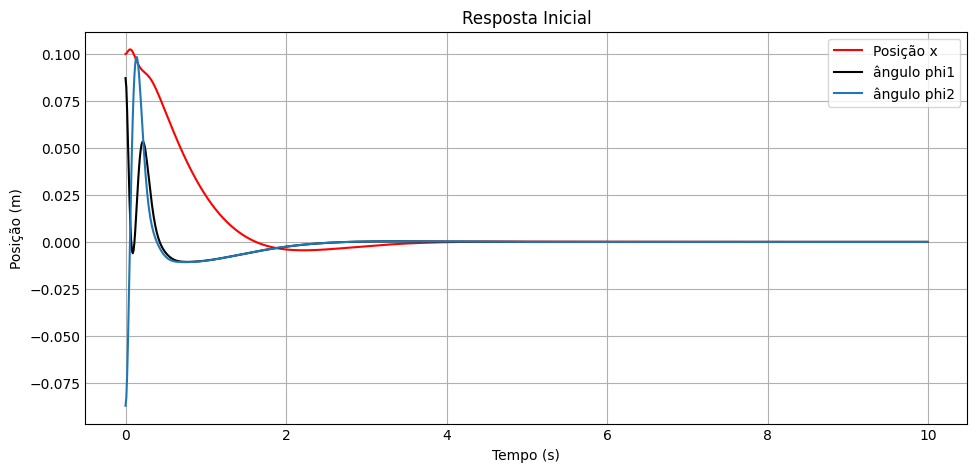

In [107]:
# Simulação 1

# Condições iniciais:
"""
Posição angular inicial de (5°) para ambos os pêndulos e posicão inicial
nula para o carro
"""

x0 = np.array([[0.1],[0.0872],[-0.0872],[0],[0],[0]])
#t = np.linspace(0, 25, 1000)
t = np.arange(0, 10, Ts)
t,y = ct.initial_response(Wip, T=t ,X0=x0)


altura = 4
largura = 9
subplots = plt.subplots(1, 1, figsize=(largura, altura))
subplots[1].plot(t,y[0],'-r', label='Posição x')
subplots[1].plot(t,y[1], '-k',label='ângulo phi1')
#subplots[1].stem(t,y[1], label='ângulo phi1')
subplots[1].plot(t,y[2], label='ângulo phi2')
#subplots[1].stem(t,y[2], label='ângulo phi2')
subplots[1].set_title('Resposta Inicial')
subplots[1].set_xlabel('Tempo (s)')
subplots[1].set_ylabel('Posição (m)')
subplots[1].grid(True)
subplots[1].legend()

plt.show()

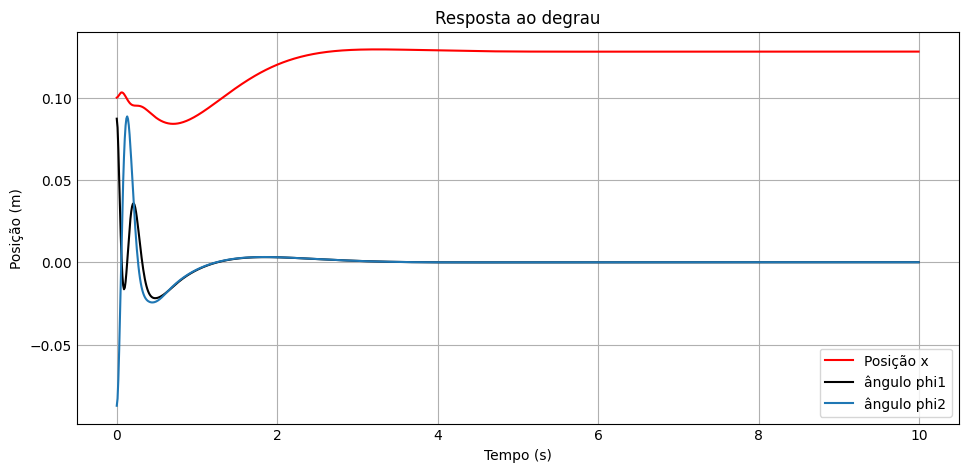

In [108]:
s,p = ct.step_response(Wip,T=t,X0=x0)

altura = 4
largura = 9
subplots = plt.subplots(1, 1, figsize=(largura, altura))
subplots[1].plot(s,p[0][0],'-r', label='Posição x')
subplots[1].plot(s,p[1][0], '-k',label='ângulo phi1')
#subplots[1].stem(t,y[1], label='ângulo phi1')
subplots[1].plot(s,p[2][0], label='ângulo phi2')
#subplots[1].stem(t,y[2], label='ângulo phi2')
subplots[1].set_title('Resposta ao degrau')
subplots[1].set_xlabel('Tempo (s)')
subplots[1].set_ylabel('Posição (m)')
subplots[1].grid(True)
subplots[1].legend()

plt.show()

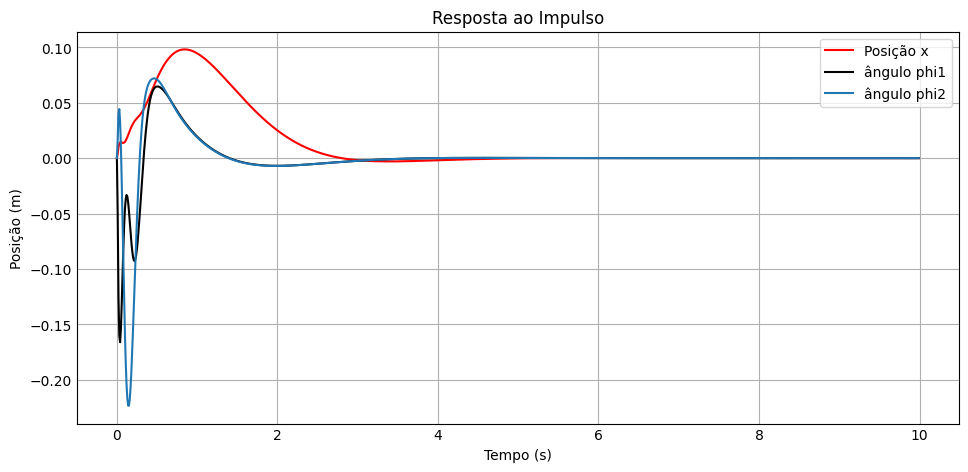

In [109]:
i,r = ct.impulse_response(Wip,T=t)
altura = 4
largura = 9
subplots = plt.subplots(1, 1, figsize=(largura, altura))
subplots[1].plot(i,r[0][0],'-r', label='Posição x')
subplots[1].plot(i,r[1][0], '-k',label='ângulo phi1')
#subplots[1].stem(t,y[1], label='ângulo phi1')
subplots[1].plot(i,r[2][0], label='ângulo phi2')
#subplots[1].stem(t,y[2], label='ângulo phi2')
subplots[1].set_title('Resposta ao Impulso')
subplots[1].set_xlabel('Tempo (s)')
subplots[1].set_ylabel('Posição (m)')
subplots[1].grid(True)
subplots[1].legend()

plt.show()

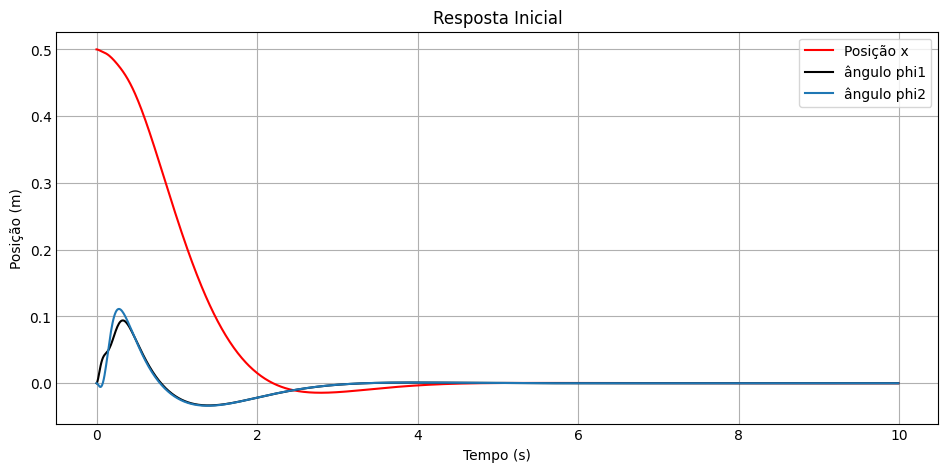

In [110]:
# Simulação 2

# Condições iniciais:
"""
Posição angular inicial nula para ambos os pêndulos e posicão inicial
em x = 0.5 m para o carro
"""

x0 = np.array([[0.5],[0.0],[0.0],[0],[0],[0]])
#t = np.linspace(0, 25, 1000)
t = np.arange(0, 10, Ts)
t,y = ct.initial_response(Wip, T=t ,X0=x0)
s,p = ct.step_response(Wip,T=t,X0=x0)

altura = 4
largura = 9
subplots = plt.subplots(1, 1, figsize=(largura, altura))
subplots[1].plot(t,y[0],'-r', label='Posição x')
subplots[1].plot(t,y[1], '-k',label='ângulo phi1')
#subplots[1].stem(t,y[1], label='ângulo phi1')
subplots[1].plot(t,y[2], label='ângulo phi2')
#subplots[1].stem(t,y[2], label='ângulo phi2')
subplots[1].set_title('Resposta Inicial')
subplots[1].set_xlabel('Tempo (s)')
subplots[1].set_ylabel('Posição (m)')
subplots[1].grid(True)
subplots[1].legend()
plt.show()

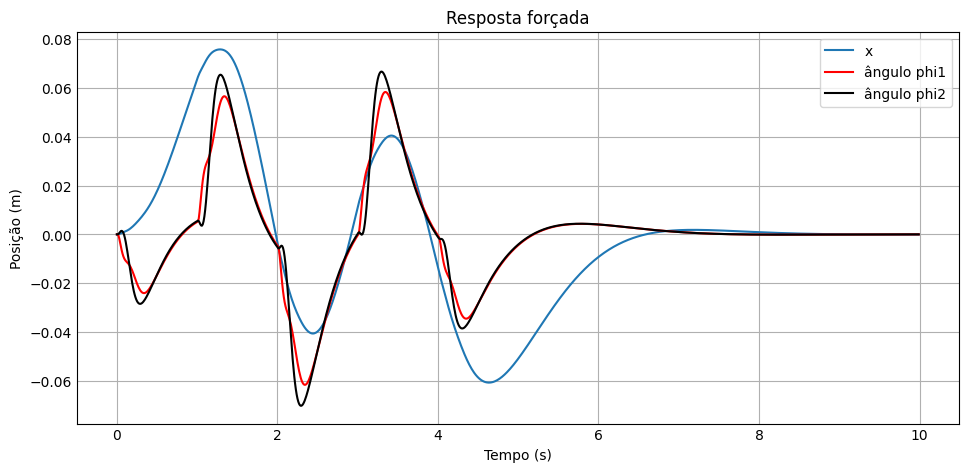

In [112]:
# Simulação 3

# Aplicando entrada 

# Definindo a função de entrada personalizada
def input_signal(t, t_entrada_apply, amplitude_pert):
    if t> 0 and t<=1:
        sinal_entrada = 1
    elif t> 1 and t<=2:
        sinal_entrada = -1
    elif t> 2 and t<=3:
        sinal_entrada =1
    elif t>3 and t<=4:
        sinal_entrada=-1
    else:
        sinal_entrada = 0
        
    return sinal_entrada

# Instante de tempo em que a entrada será aplicada
t_entrada_apply = 2

# Amplitude da entrada
amplitude_pert =0.2


# Aplicando a entrada
u = [input_signal(t_i, t_entrada_apply, amplitude_pert) for t_i in t]
#u = np.square(np.sin(2*np.pi*t))
#u = 8
# Calculando a resposta do sistema com a entrada aplicada
#t_out, y_out, w_out = ct.forced_response(Wip, T=t, U=u)
#t_out, y_out= ct.forced_response(Wip, T=t, U=u)
t_out, y_out= ct.input_output_response(Wip,t,U=u)
# Plotando a saída
subplots = plt.subplots(1, 1, figsize=(largura, altura))
subplots[1].plot(t_out, y_out[0],label='x')
subplots[1].plot(t_out, y_out[1],'-r', label='ângulo phi1')
subplots[1].plot(t_out, y_out[2],'-k',label='ângulo phi2')
subplots[1].set_title('Resposta forçada')
subplots[1].set_xlabel('Tempo (s)')
subplots[1].set_ylabel('Posição (m)')
subplots[1].grid(True)
subplots[1].legend()
plt.show()